# 6.5 Unsupervised Machine Learning: Clustering

### This script contains the following:

#### 1. Importing libraries and datns
#### 2. The elbow technique
#### 3. k-means clustering

## 01. Importing Libraries and Data

In [25]:
# Iport Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [26]:
%matplotlib inline

In [27]:
# Importing Data
# Create path
path = r'C:\Users\Dell\Documents\IBM Watson Marketing Customer Value Data'

In [28]:
# import customer_value dataset
df = pd.read_pickle(os.path.join(path, '02. Data', 'Prepared Data', 'customer_value_new.pkl'))

In [29]:
df.columns

Index(['Customer Id', 'State', 'Customer Lifetime Value', 'Response',
       'Coverage', 'Policy Expiry Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [30]:
df.dtypes

Customer Id                       object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Policy Expiry Date                object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
dtype: object

## 02. The elbow technique

In [31]:
df=df.select_dtypes(include=['int64','float64'])

In [32]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [33]:
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_k

[-8861158707035.242,
 -2578193366770.6133,
 -1356725413991.9695,
 -866391446159.4375,
 -690181144940.9056,
 -578727148345.1097,
 -489695811785.4765,
 -422971248405.7735,
 -365806696559.2789]

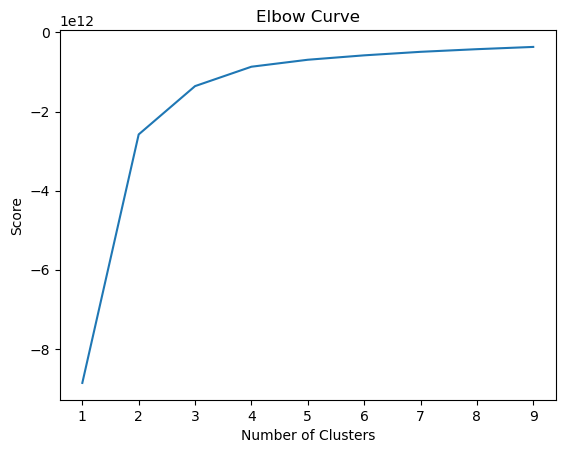

In [34]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#### In the elbow curve, there's a significant increase in the curve's slope as we move from two to three clusters, and then from three to four clusters on the x-axis. However, beyond four clusters, the curve tends to flatten out. This suggests that the optimal number of clusters for your data is three.

## 03. k-means clustering

In [35]:
# Create the k-means object.
kmeans = KMeans(n_clusters = 3) 

In [36]:
# Fit the k-means object to the data.
kmeans.fit(df)

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [37]:
df['clusters'] = kmeans.fit_predict(df)

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [38]:
df.columns

Index(['Customer Lifetime Value', 'Income', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Total Claim Amount',
       'clusters'],
      dtype='object')

In [39]:
df.head(15)

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,clusters
0,2763.519279,56274,69,32,5,0,1,384.811147,1
1,6979.535903,0,94,13,42,0,8,1131.464935,0
2,12887.431650,48767,108,18,38,0,2,566.472247,2
3,7645.861827,0,106,18,65,0,7,529.881344,0
4,2813.692575,43836,73,12,44,0,1,138.130879,2
5,8256.297800,62902,69,14,94,0,2,159.383042,1
6,5380.898636,55350,67,0,13,0,9,321.600000,1
7,7216.100311,0,101,0,68,0,4,363.029680,0
8,24127.504020,14072,71,13,3,0,2,511.200000,0
9,7388.178085,28812,93,17,7,0,8,425.527834,2


In [40]:
df['clusters'].value_counts()

clusters
2    3473
1    2934
0    2727
Name: count, dtype: int64

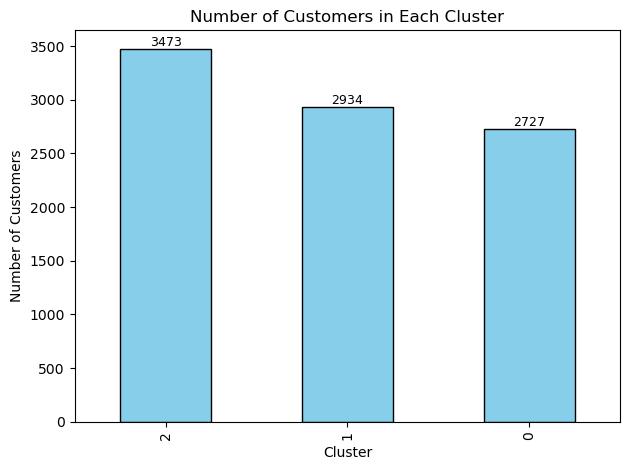

In [41]:
# Plotting the bar chart
cluster_counts = df['clusters'].value_counts()

# Plotting the bar chart
ax = cluster_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Adding titles and labels
plt.title('Number of Customers in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')

# Adding the count labels on top of each bar
for i, count in enumerate(cluster_counts):
    ax.text(i, count + 0.1, str(count), ha='center', va='bottom', fontsize=9)

# Display the plot
plt.tight_layout()
plt.show()

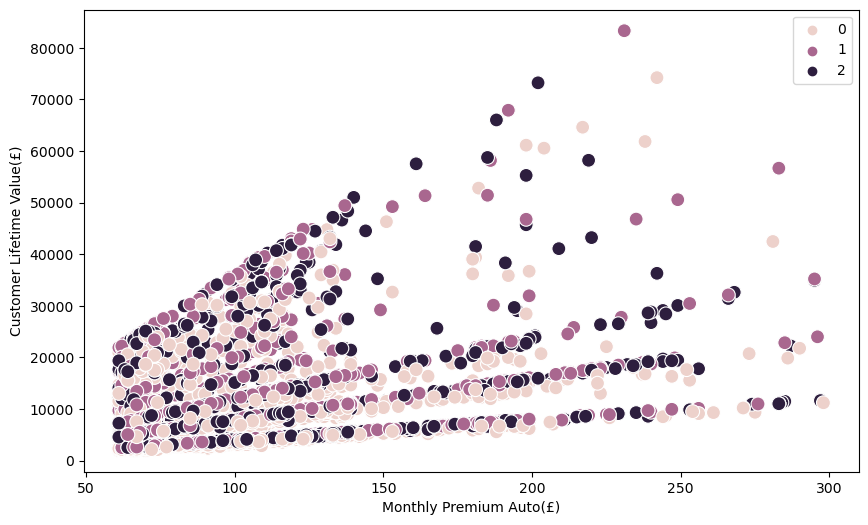

In [42]:
# Plot the clusters for the 'Customer Lifetime Value'and 'Monthly Premium Auto' variables.

plt.figure(figsize=(10,6))
ax = sns.scatterplot(x=df['Monthly Premium Auto'], y=df['Customer Lifetime Value'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Monthly Premium Auto(£)') # Label x-axis.
plt.ylabel('Customer Lifetime Value(£)') # Label y-axis.
plt.show()

#### We observe a clear trend where an increase in Monthly Premium correlates with a rise in Customer Lifetime Value. This suggests that as customers pay higher monthly premiums, their lifetime value also tends to increase. Clusters with higher Customer Lifetime Values, possibly clusters 1 and 2, could benefit from intensified customer retention strategies and loyalty programs.
#### The distribution of data points within each cluster may indicate variability in risk or other influential factors within those customer segments. Understanding these patterns could help fine-tune pricing strategies to align better with the perceived risk or potential value associated with each segment.

In [57]:
cluster_stats = df.groupby('clusters')[['Monthly Premium Auto', 'Customer Lifetime Value']].describe()

In [58]:
print(cluster_stats)

         Monthly Premium Auto                                                 \
                        count       mean        std   min   25%   50%    75%   
clusters                                                                       
0                      2921.0  92.843889  33.904423  61.0  69.0  83.0  109.0   
1                      3482.0  92.675761  34.878230  61.0  68.0  82.0  108.0   
2                      2731.0  94.313804  34.326316  61.0  69.0  84.0  111.0   

                Customer Lifetime Value                            \
            max                   count         mean          std   
clusters                                                            
0         296.0                  2921.0  8156.891477  6862.421735   
1         297.0                  3482.0  8126.048356  7111.052293   
2         298.0                  2731.0  7688.006562  6553.327645   

                                                                           
                  min       

In [43]:
# Plot the clusters for the 'Customer Lifetime Value' and 'Number of Open Complaints' 
# Create the k-means object.
kmeans = KMeans(n_clusters = 3) 

In [44]:
# Fit the k-means object to the data.
kmeans.fit(df)

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [45]:
df['clusters'] = kmeans.fit_predict(df)

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


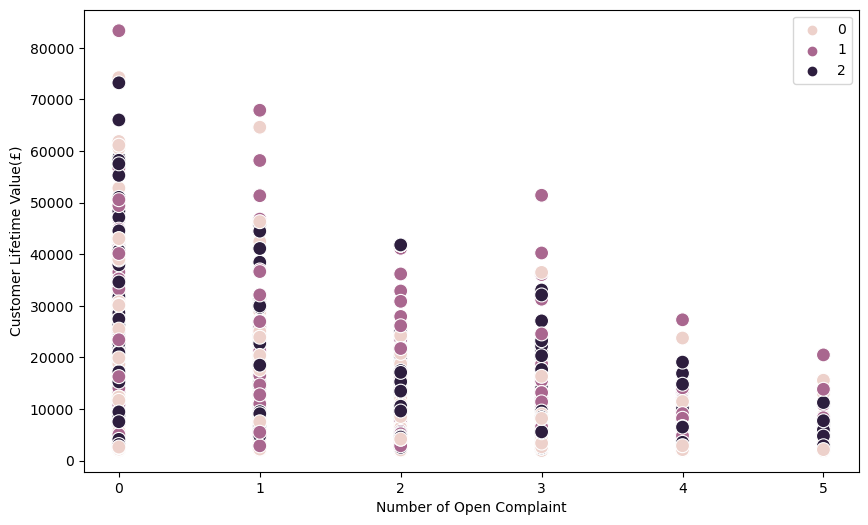

In [46]:
plt.figure(figsize=(10,6))
ax = sns.scatterplot(x=df['Number of Open Complaints'], y=df['Customer Lifetime Value'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Number of Open Complaint') # Label x-axis.
plt.ylabel('Customer Lifetime Value(£)') # Label y-axis.
plt.show()

#### The relationship between open complaints and CLV in the provided data does not show a direct or simple negative correlation. Customers with a higher number of complaints can still maintain a high CLV, indicating that complaints alone are not a definitive factor in determining the overall value of a customer.

In [59]:
cluster_stats = df.groupby('clusters')[['Number of Open Complaints', 'Customer Lifetime Value']].describe()


In [60]:
print(cluster_stats)

         Number of Open Complaints                                          \
                             count      mean       std  min  25%  50%  75%   
clusters                                                                     
0                           2921.0  0.385484  0.914485  0.0  0.0  0.0  0.0   
1                           3482.0  0.392590  0.913421  0.0  0.0  0.0  0.0   
2                           2731.0  0.372757  0.902283  0.0  0.0  0.0  0.0   

              Customer Lifetime Value                                         \
          max                   count         mean          std          min   
clusters                                                                       
0         5.0                  2921.0  8156.891477  6862.421735  2255.312942   
1         5.0                  3482.0  8126.048356  7111.052293  2227.072755   
2         5.0                  2731.0  7688.006562  6553.327645  1898.007675   

                                                  

#### The means of 'Number of Open Complaints' are very low across all clusters (around 0.37 to 0.39), indicating that most customers do not have open complaints.The standard deviations and percentiles show that the majority of customers have zero open complaints, with the maximum being 1 in each cluster
This feature does not vary much among the clusters, suggesting that the number of open complaints is not a major differentiator among these cluters.

In [49]:
# Plot the clusters for the 'Customer Lifetime Value' and 'Months Since Policy Inception' 
# Create the k-means object.
kmeans = KMeans(n_clusters = 3) 

In [50]:
# Fit the k-means object to the data.
kmeans.fit(df)

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [51]:
df['clusters'] = kmeans.fit_predict(df)

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


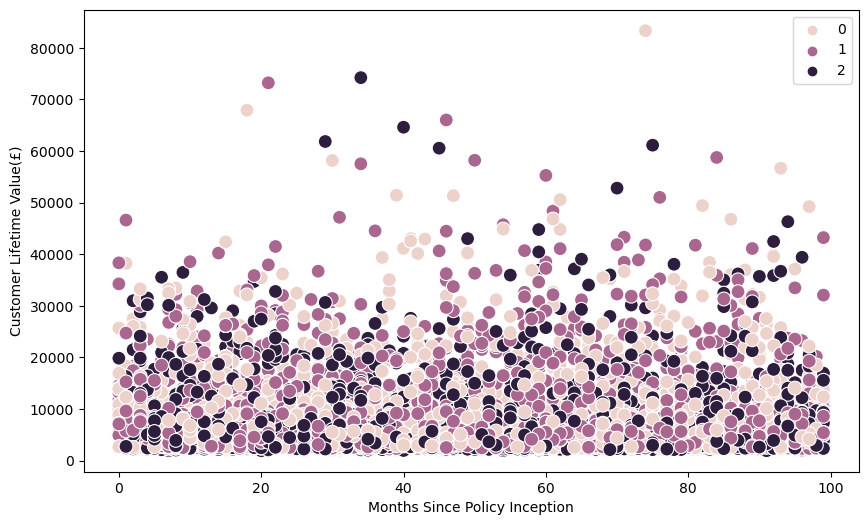

In [52]:
plt.figure(figsize=(10,6))
ax = sns.scatterplot(x=df['Months Since Policy Inception'], y=df['Customer Lifetime Value'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Months Since Policy Inception') # Label x-axis.
plt.ylabel('Customer Lifetime Value(£)') # Label y-axis.
plt.show()

In [53]:
cluster_stats = df.groupby('clusters')[['Months Since Policy Inception', 'Customer Lifetime Value']].describe()

In [54]:
print(cluster_stats)

         Months Since Policy Inception                                         \
                                 count       mean        std  min   25%   50%   
clusters                                                                        
0                               2921.0  48.579596  28.379279  0.0  24.0  48.0   
1                               3482.0  47.528145  27.456056  0.0  24.0  47.0   
2                               2731.0  48.197730  27.962738  0.0  25.0  48.0   

                     Customer Lifetime Value                            \
           75%   max                   count         mean          std   
clusters                                                                 
0         73.0  99.0                  2921.0  8156.891477  6862.421735   
1         70.0  99.0                  3482.0  8126.048356  7111.052293   
2         71.0  99.0                  2731.0  7688.006562  6553.327645   

                                                                    

#### The means of 'Months Since Policy Inception' are very close across all clusters, indicating that the average duration of customer policy is similar across clusters.
The standard deviations and percentiles also show a similar spread across the clusters, with a slight variation in the 75th percentile
This feature does not show significant differentiation among the clusters.

#### The better analysis would be one that includes features that show significant variation and help in distinguishing between clusters.
'Customer Lifetime Value' is a strong differentiatorOn the other hand, 'Monthly Premium Auto' provided slightly more information about differences between clusters compared to other variables likee 'Number of Open Complaints & 'Months Since Policy Inception't.

### The abovee displays statistical summaries of customer data divided into four clusters, emphasizing two primary metrics: Monthly Premium Auto and Customer Lifetime Value. These statistics hold significant value for various future steps in an analytics pipeline, particularly in customer segmentation, personalized marketing, risk management, and resource allocation. Disparities in mean, standard deviation, and percentile values among clusters for both Monthly Premium Auto and Customer Lifetime Value suggest diverse customer profiles, which can be further examined to customize specific products or services. Clusters with higher average Monthly Premiums or Customer Lifetime Values may be targeted with premium product offerings or loyalty programs, while those with lower values may respond better to cost-effective solutions or discounts. The variability within clusters, indicated by standard deviation and range (from minimum to maximum), can inform risk assessment and management strategies. Clusters with higher variability might necessitate more meticulous analysis and monitoring to effectively manage potential risks. Resources can be allocated more efficiently by prioritizing customer service efforts on clusters with higher lifetime values or greater profitability, ensuring that high-value customers receive adequate support and attention. Monitoring these clusters over time aids in tracking performance and identifying areas for improvement. Changes in cluster statistics can signal shifts in customer behavior or market conditions, prompting timely adjustments in business strategies.






